In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('Dados preliminares - Página1.csv')

columns_to_normalize = ['Eixo X', 'Eixo Y', 'Sensor 1']
columns_to_exclude = ['Posição']
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df[columns_to_normalize]), columns=columns_to_normalize)
df = pd.concat([df_normalized, df[columns_to_exclude]], axis=1)
df.head()

,Eixo X,Eixo Y,Sensor 1,Posição
0,0.067164,0.979933,0.90875,0
1,0.865672,0.120401,0.88000,1
2,0.895522,0.117057,0.22625,2
3,0.626866,0.381271,0.86000,3
4,0.664179,0.387960,0.07125,4


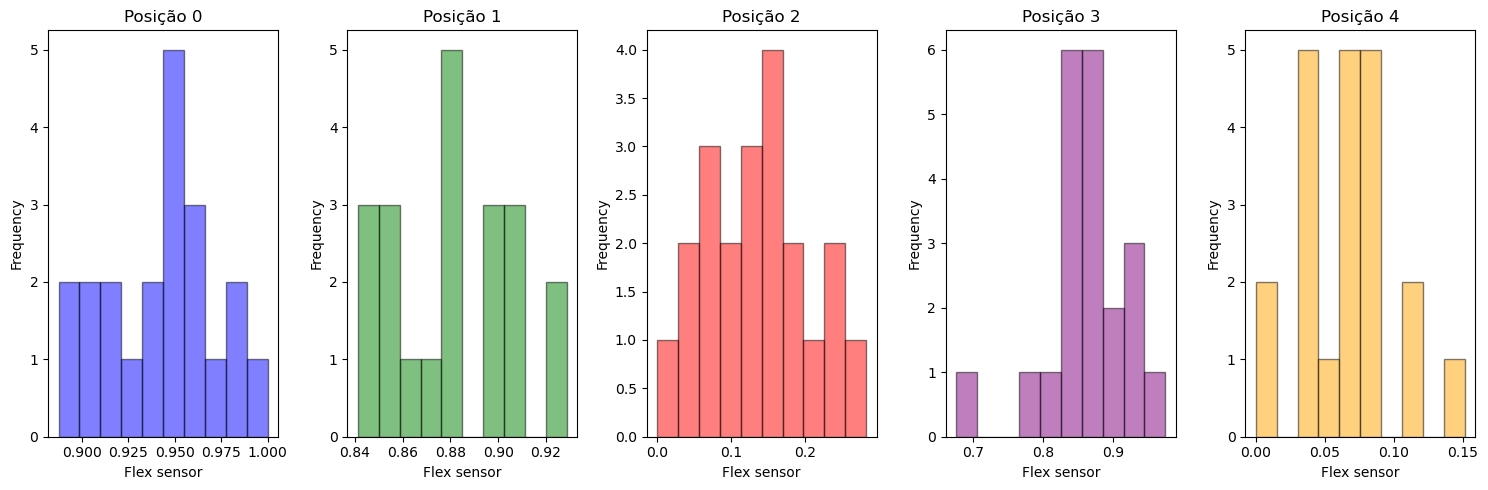

In [2]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

# Plot histograms in each subplot
colors = ['blue', 'green', 'red', 'purple', 'orange']


for i, ax in enumerate(axes):
    ax.hist(df[df['Posição'] == i]['Sensor 1'], bins=10, color=colors[i], alpha=0.5, edgecolor='black')
    ax.set_title(f'Posição {i}')
    ax.set_xlabel('Flex sensor')
    ax.set_ylabel('Frequency')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

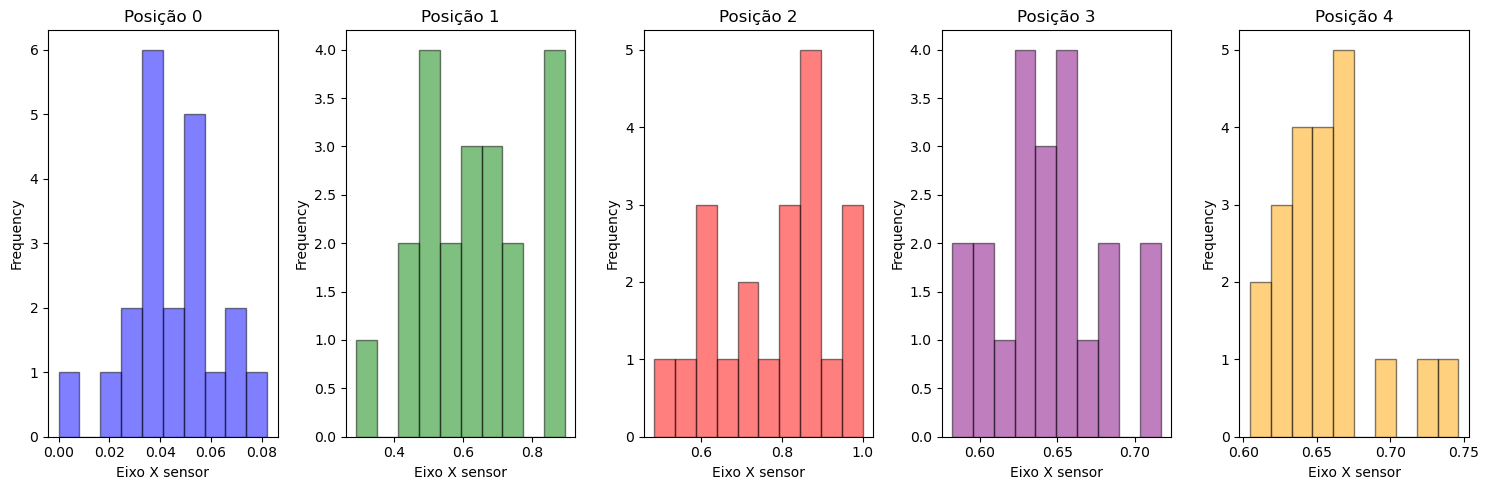

In [3]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 5, figsize=(15, 5))


for i, ax in enumerate(axes):
    ax.hist(df[df['Posição'] == i]['Eixo X'], bins=10, color=colors[i], alpha=0.5, edgecolor='black')
    ax.set_title(f'Posição {i}')
    ax.set_xlabel('Eixo X sensor')
    ax.set_ylabel('Frequency')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

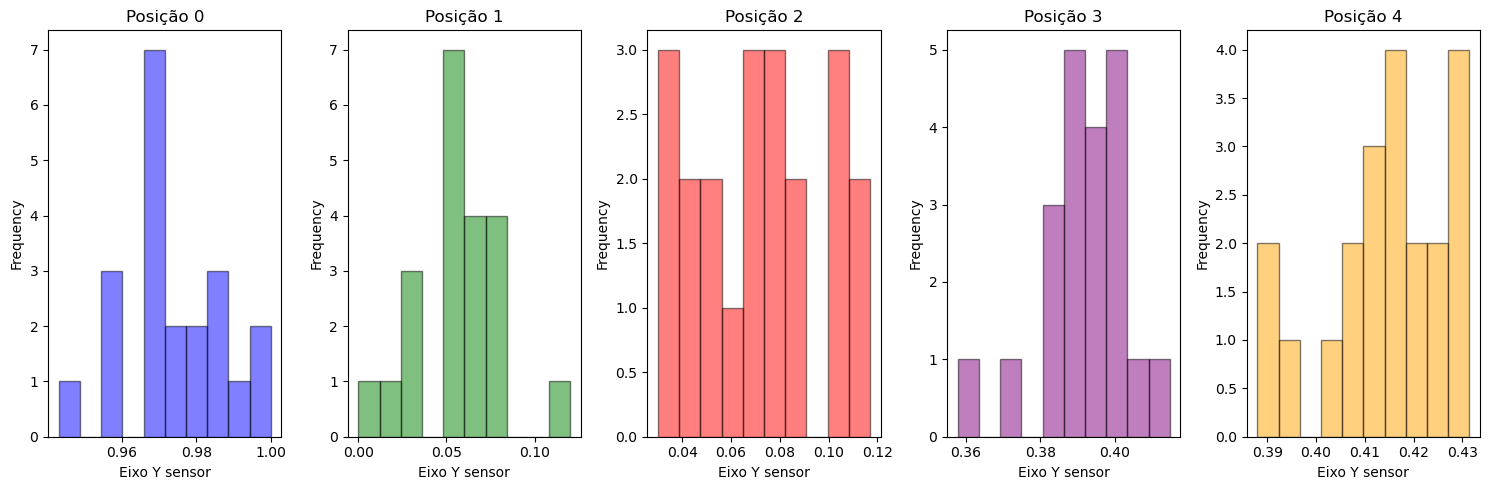

In [4]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i, ax in enumerate(axes):
    ax.hist(df[df['Posição'] == i]['Eixo Y'], bins=10, color=colors[i], alpha=0.5, edgecolor='black')
    ax.set_title(f'Posição {i}')
    ax.set_xlabel('Eixo Y sensor')
    ax.set_ylabel('Frequency')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

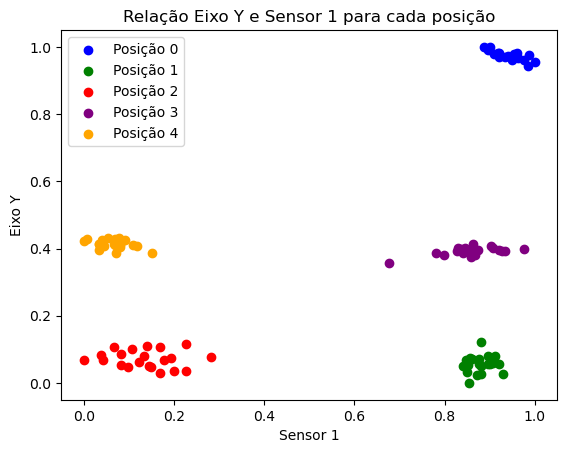

In [5]:
# Create a scatter plot with different colors for each group
for i in range(5):
    plt.scatter(df[df['Posição'] == i]['Sensor 1'], df[df['Posição'] == i]['Eixo Y'], c=colors[i], label=f'Posição {i}')

# Add labels, legend, and title
plt.xlabel('Sensor 1')
plt.ylabel('Eixo Y')
plt.legend()
plt.title('Relação Eixo Y e Sensor 1 para cada posição')

# Show the plot
plt.show()

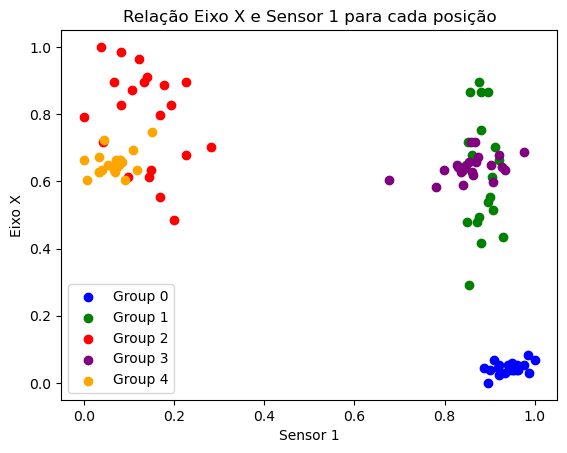

In [6]:
# Create a scatter plot with different colors for each group
for i in range(5):
    plt.scatter(df[df['Posição'] == i]['Sensor 1'], df[df['Posição'] == i]['Eixo X'], c=colors[i], label=f'Group {i}')

# Add labels, legend, and title
plt.xlabel('Sensor 1')
plt.ylabel('Eixo X')
plt.legend()
plt.title('Relação Eixo X e Sensor 1 para cada posição')

# Show the plot
plt.show()

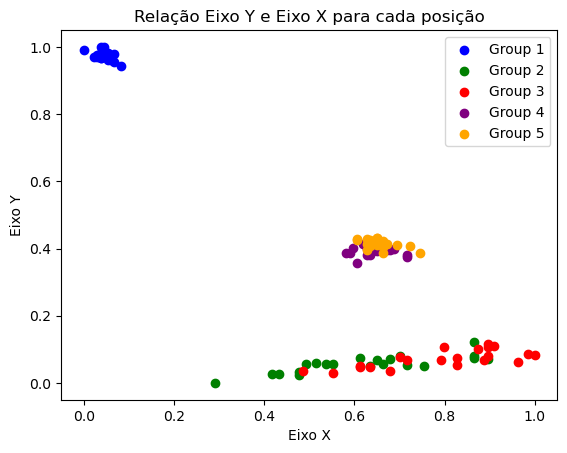

In [7]:
# Create a scatter plot with different colors for each group
for i in range(5):
    plt.scatter(df[df['Posição'] == i]['Eixo X'], df[df['Posição'] == i]['Eixo Y'], c=colors[i], label=f'Group {i + 1}')

# Add labels, legend, and title
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.legend()
plt.title('Relação Eixo Y e Eixo X para cada posição')

# Show the plot
plt.show()

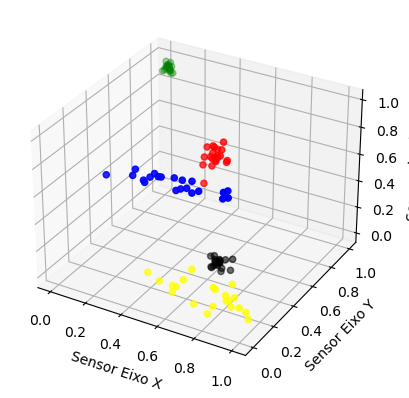

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np

color_mapping = {0: 'green',1: 'blue', 2: 'yellow', 3: 'red', 4: 'black'}
dfColors = df.copy()
dfColors['Colors'] = df['Posição'].map(color_mapping)

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(dfColors['Eixo X'], dfColors['Eixo Y'], dfColors['Sensor 1'], c=dfColors['Colors'])

# Set labels for each axis
ax.set_xlabel('Sensor Eixo X')
ax.set_ylabel('Sensor Eixo Y')
ax.set_zlabel('Sensor de Flexão')

# Show the plot
plt.show()


In [9]:
#Separando os dados em treinamento e teste 
train = df.iloc[:-30]
test = df.iloc[-30:]

#Alterando a ordenação das linhas
train = train.sample(frac=1.0, random_state=42)
test = test.sample(frac=1.0, random_state=42)

In [10]:
X_train = train.iloc[:, :3]
X_test = test.iloc[:, :3]
y_train = train['Posição']
y_test = test['Posição']

In [11]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model = SVC()
model.fit(X_train, y_train)

# Faça previsões nos dados de teste
y_pred = model.predict(X_test)

# Avalie a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo SVM: {accuracy:.2f}')

Acurácia do modelo SVM: 1.00


In [12]:
from sklearn.linear_model import LogisticRegression

# Criando um modelo de regressão logística
model = LogisticRegression(max_iter=3000)

# Treinando o modelo
model.fit(X_train, y_train)

# Faça previsões nos dados de teste
y_pred = model.predict(X_test)

# Avalie a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo Logistic Regression: {accuracy:.2f}')


Acurácia do modelo Logistic Regression: 1.00


In [13]:
from sklearn.tree import DecisionTreeClassifier

# Criando um modelo de árvore de decisão
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

# Faça previsões nos dados de teste
y_pred = model.predict(X_test)

# Avalie a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo Decision Tree Classifier: {accuracy:.2f}')

Acurácia do modelo Decision Tree Classifier: 1.00


In [14]:
from sklearn.ensemble import RandomForestClassifier

# Criando um modelo de Random Forest
model = RandomForestClassifier()

model.fit(X_train, y_train)

# Faça previsões nos dados de teste
y_pred = model.predict(X_test)

# Avalie a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo Random Forest Classifier: {accuracy:.2f}')

Acurácia do modelo Random Forest Classifier: 1.00
